<a href="https://colab.research.google.com/github/gfeyzakorkmaz/Tries/blob/main/AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Dataset/Orders.xlsx'

df = pd.read_excel(path)
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row,Order Priority,Order Date,Order,Discount,Unit Price,Order Quantity,Sales,Profit,Shipping Cost,...,Customer,Customer Name,Region,State,Country / Region,City,Postal Code,Ship Date,Ship Mode,SubRegion
0,1,High,2017-01-01,28774,0.10,6,32,172.80,106.36,5,...,1656,Joy Corbett,AsiaPac,Central,Fiji,Suva,NaN,2017-01-02 00:00:00,Regular Air,NaN
1,2,Not Specified,2017-01-01,88028,0.08,96,2,176.64,45.64,35,...,2211,Anita Hahn,North America,Maryland,United States of America,Bowie,20715.0,2017-01-03 00:00:00,Express Air,East ...
2,3,Critical,2017-01-02,9285,0.06,41,3,115.62,33.90,3,...,949,Ernest Oh,North America,California,United States of America,Los Angeles,90049.0,2017-01-04 00:00:00,Regular Air,West ...
3,4,Low,2017-01-02,37537,0.00,292,4,1168.00,605.08,49,...,68,Scott Bunn,North America,New York,United States of America,New York City,10177.0,2017-01-02 00:00:00,Delivery Truck,East ...
4,5,Low,2017-01-02,37537,0.07,101,43,4038.99,2647.66,45,...,68,Scott Bunn,North America,New York,United States of America,New York City,10177.0,2017-01-04 00:00:00,Delivery Truck,East ...


In [3]:
print(df.dtypes)

Row                             int64
Order Priority                 object
Order Date             datetime64[ns]
Order                           int64
Discount                      float64
Unit Price                      int64
Order Quantity                  int64
Sales                         float64
Profit                        float64
Shipping Cost                   int64
Product Base Margin           float64
Department                     object
Container                      object
Category                       object
Item                           object
Customer Segment               object
Customer                        int64
Customer Name                  object
Region                         object
State                          object
Country / Region               object
City                           object
Postal Code                   float64
Ship Date                      object
Ship Mode                      object
SubRegion                      object
dtype: objec

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
print(df[['Order Date']].head())

  Order Date
0 2017-01-01
1 2017-01-01
2 2017-01-02
3 2017-01-02
4 2017-01-02


In [6]:
monetary_columns = ['Sales', 'Profit']
for col in monetary_columns:
  df[col] = df[col].astype(str).str.replace('[\$]', '', regex=True).astype(float)

  print(df[monetary_columns].head())

     Sales   Profit
0   172.80   106.36
1   176.64    45.64
2   115.62    33.90
3  1168.00   605.08
4  4038.99  2647.66
     Sales   Profit
0   172.80   106.36
1   176.64    45.64
2   115.62    33.90
3  1168.00   605.08
4  4038.99  2647.66


In [8]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

df.fillna(df.median(numeric_only=True), inplace=True)

Missing Values per Column:
 Row                       0
Order Priority            0
Order Date                0
Order                     0
Discount                  0
Unit Price                0
Order Quantity            0
Sales                     0
Profit                    0
Shipping Cost             0
Product Base Margin       0
Department                0
Container                 0
Category                  0
Item                      0
Customer Segment          0
Customer                  0
Customer Name             0
Region                    0
State                     0
Country / Region          0
City                      0
Postal Code            6985
Ship Date                 0
Ship Mode                 0
SubRegion              7316
dtype: int64


In [9]:
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()
print(category_summary)

                          Category       Sales       Profit
0                       Appliances  1458572.86   740777.960
1   Binders and Binder Accessories  2054422.27   548972.606
2                        Bookcases  1596962.82   997683.790
3               Chairs & Chairmats  3354397.70  1966619.350
4             Computer Peripherals  1557723.11   866448.950
5                  Copiers and Fax  2247147.00   854700.000
6                        Envelopes   369867.56   126692.470
7                           Labels    72769.65    23527.990
8               Office Furnishings  1385524.83   704444.520
9                  Office Machines  4322525.53  1573939.170
10                           Paper   834738.49   269740.950
11             Pens & Art Supplies   322980.07   164982.540
12                    Rubber Bands    30901.47    13957.260
13   Scissors, Rulers and Trimmers   171933.23   123623.470
14          Storage & Organization  2195635.21  1204635.160
15                          Tables  3700

In [10]:
import numpy as np

df['Discount Impact'] = np.where(df['Discount'] > 0.2, 'High', 'Low')
discount_impact_summary = df.groupby('Discount Impact')['Profit'].mean()
print(discount_impact_summary)

Discount Impact
High   -744.250336
Low     895.224491
Name: Profit, dtype: float64


In [11]:
state_sales_rankin = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
print(state_sales_rankin.head(10))


                      State       Sales
0           Guangdong Sheng  1285183.65
1                California  1166081.26
2  Province de Buenos Aires  1054208.42
3                Al Qahirah   782038.34
4                  New York   778524.47
5                      Soul   746679.64
6                São Paulo   744948.93
7             Île-de-France   731868.94
8                     Tokyo   722441.51
9          Distrito Federal   714682.74


In [13]:
top_products = df.groupby('Ship Mode')['Profit'].sum().nlargest(5).reset_index()
print(top_products)

        Ship Mode       Profit
0     Regular Air  6962109.786
1  Delivery Truck  6719202.305
2     Express Air  1136979.290


In [15]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
print(monthly_sales)

      Month       Sales
0   2017-01   514985.12
1   2017-02   315092.83
2   2017-03   430797.92
3   2017-04   409685.06
4   2017-05   346114.07
5   2017-06   348698.16
6   2017-07   422029.81
7   2017-08   561875.80
8   2017-09   583928.75
9   2017-10   697921.28
10  2017-11   738098.93
11  2017-12   766554.41
12  2018-01   383521.12
13  2018-02   311247.77
14  2018-03   251944.41
15  2018-04   292703.45
16  2018-05   477236.41
17  2018-06   537528.04
18  2018-07   314010.59
19  2018-08   412736.42
20  2018-09   847993.81
21  2018-10   705118.31
22  2018-11  1103963.08
23  2018-12   762293.53
24  2019-01   339394.18
25  2019-02   435500.35
26  2019-03   405404.27
27  2019-04   402060.24
28  2019-05   526008.05
29  2019-06   405160.85
30  2019-07   476627.44
31  2019-08   646329.97
32  2019-09   670413.68
33  2019-10   749302.69
34  2019-11  1547743.52
35  2019-12   794616.05
36  2020-01   624662.71
37  2020-02   468688.65
38  2020-03   517074.75
39  2020-04   490685.80
40  2020-05   72

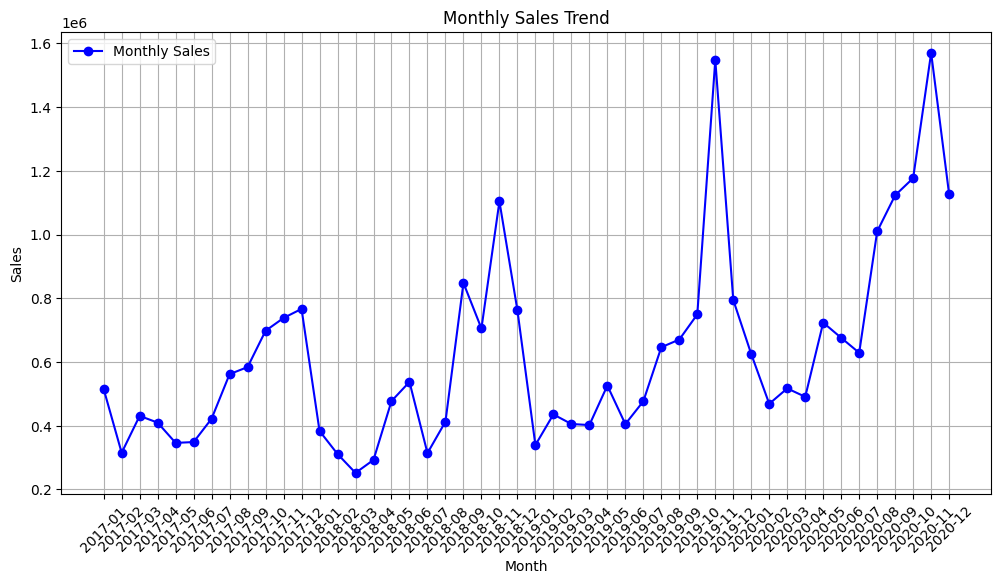

In [18]:
import matplotlib.pyplot as plt

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='b', label='Monthly Sales')
plt.xlabel("Month"),
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [21]:
customer_segment_analysis = df.groupby('Customer').agg({
    'Sales': 'sum',
    'Profit': 'mean'
}).reset_index()

print(customer_segment_analysis)

      Customer     Sales       Profit
0            1  18802.40  1097.400000
1            2      5.94     1.100000
2            3   4936.68   328.306667
3            4  49622.46  2436.856667
4            5   5991.12  1742.100000
...        ...       ...          ...
3398      3399   2197.79   194.047500
3399      3400   1916.02   113.842857
3400      3401  19565.28  1956.185000
3401      3402    665.62  -286.320000
3402      3403    644.44   163.930000

[3403 rows x 3 columns]


In [16]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100
print(df[['Ship Mode', 'Profit Margin (%)']].head())

        Ship Mode  Profit Margin (%)
0     Regular Air          61.550926
1     Express Air          25.837862
2     Regular Air          29.320187
3  Delivery Truck          51.804795
4  Delivery Truck          65.552527


<ipython-input-23-27fa96ce0b81>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='Blues')
<ipython-input-23-27fa96ce0b81>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='Blues')


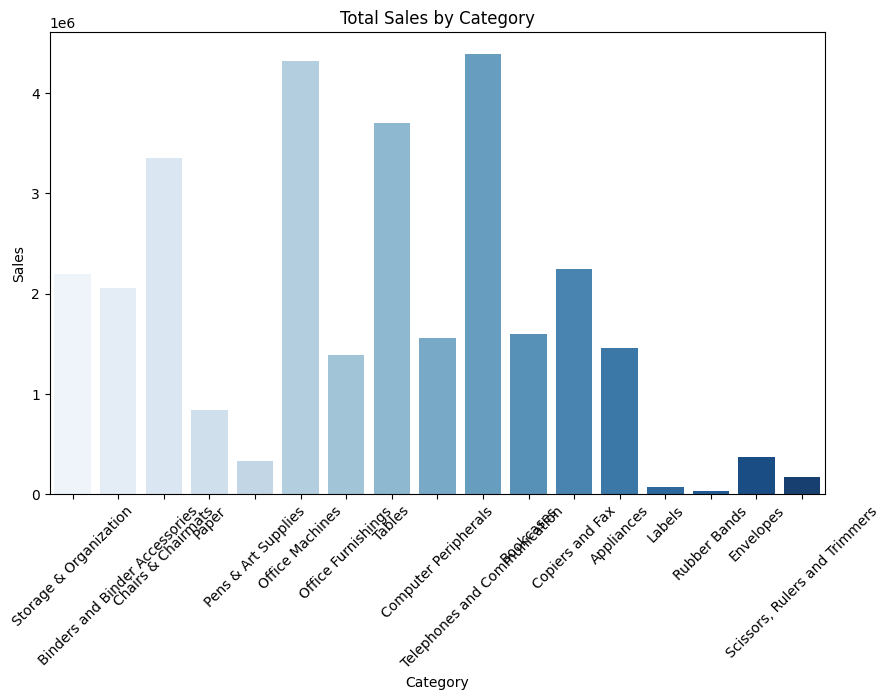

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='Blues')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

In [24]:
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()
print(correlation_matrix)

             Sales    Profit  Discount
Sales     1.000000  0.892809 -0.037370
Profit    0.892809  1.000000 -0.070475
Discount -0.037370 -0.070475  1.000000


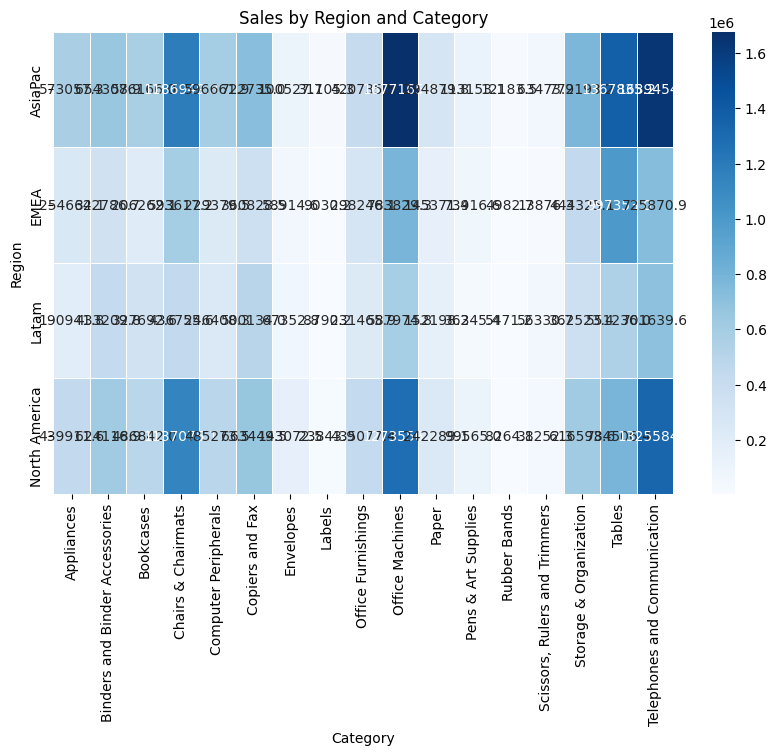

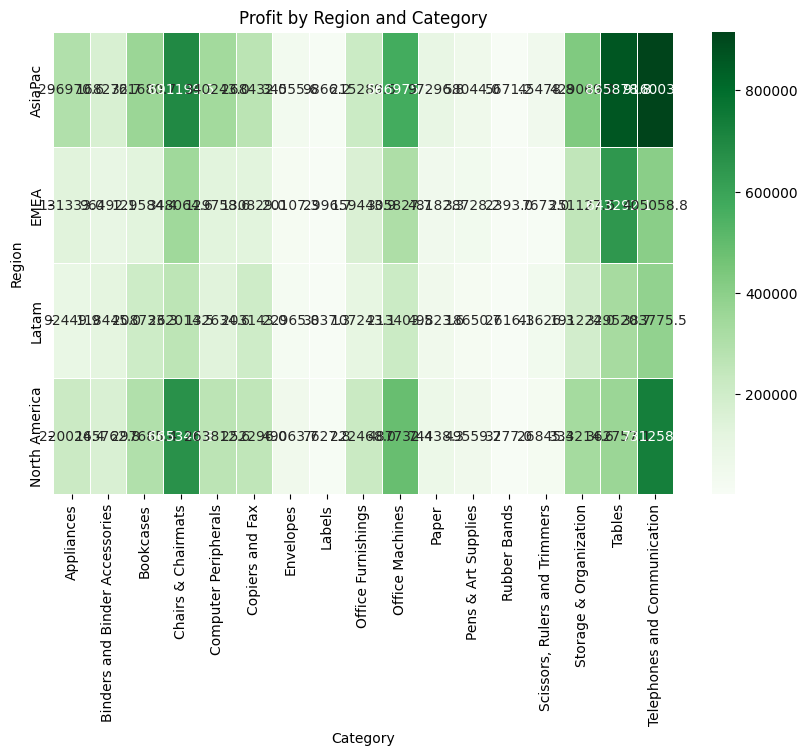

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for heatmap
heatmap_data = df.pivot_table(values=['Sales', 'Profit'], index='Region', columns='Category', aggfunc='sum')

# Sales Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data['Sales'], annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)
plt.title("Sales by Region and Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()

# Profit Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data['Profit'], annot=True, fmt=".1f", cmap="Greens", linewidths=0.5)
plt.title("Profit by Region and Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()


ChatGPT-----